In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from skl2onnx import to_onnx

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

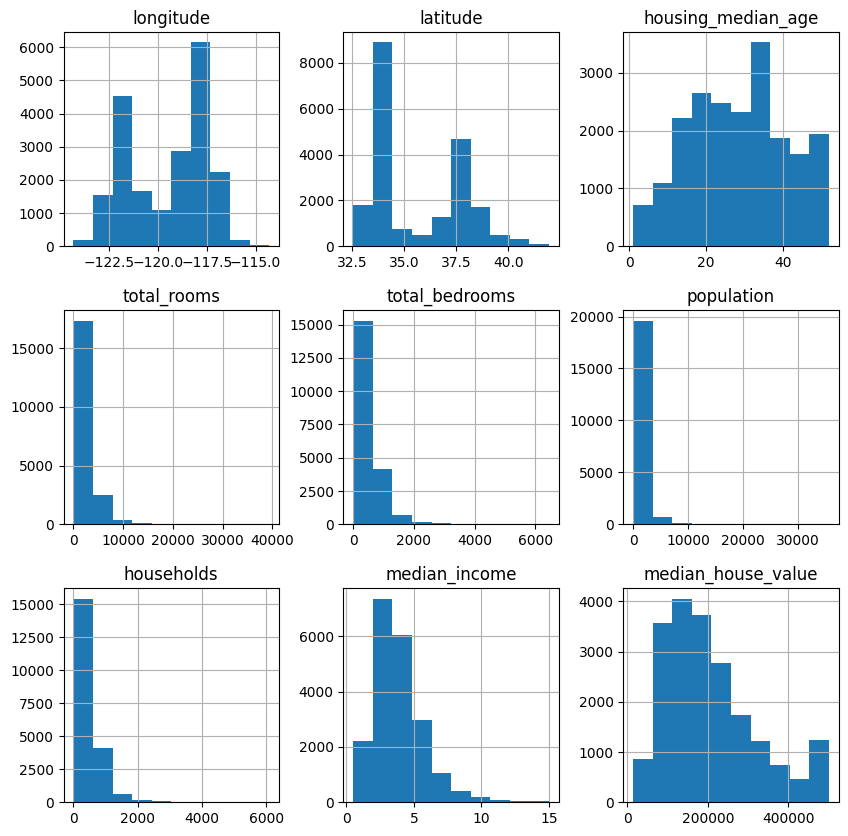

In [9]:
df.hist(figsize=(10, 10))

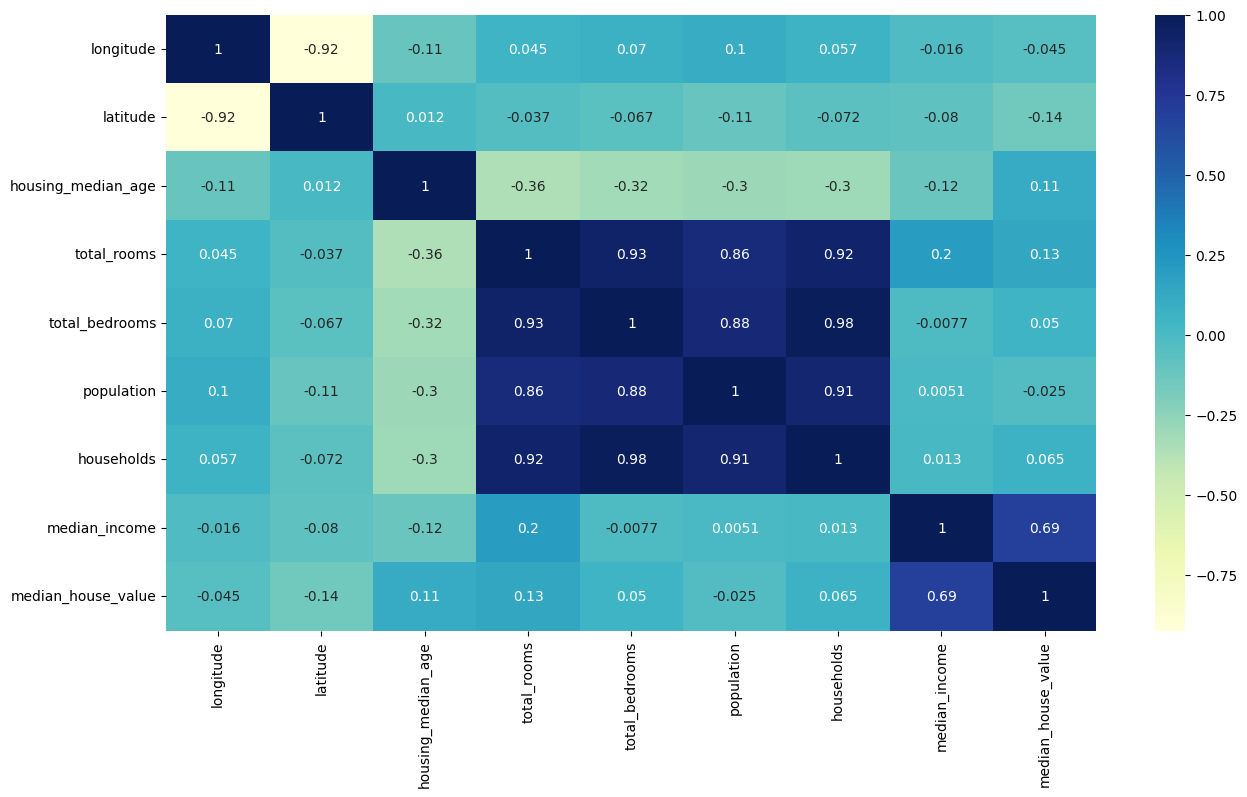

In [10]:
def corr_hm(data: pd.DataFrame):
    plt.figure(figsize=(15,8))
    sns.heatmap(
        data.corr(numeric_only=True),
        annot=True,
        cmap="YlGnBu",
)

corr_hm(df)

In [11]:
dummies = ["ocean_proximity"]
df_1 = pd.get_dummies(
    data=df,
    prefix=dummies,
    columns=dummies,
    dtype=float
)
df_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  float64
 10  ocean_proximity_INLAND      20433 non-null  float64
 11  ocean_proximity_ISLAND      20433 non-null  float64
 12  ocean_proximity_NEAR BAY    20433 non-null  float64
 13  ocean_proximity_NEAR OCEAN  20433 no

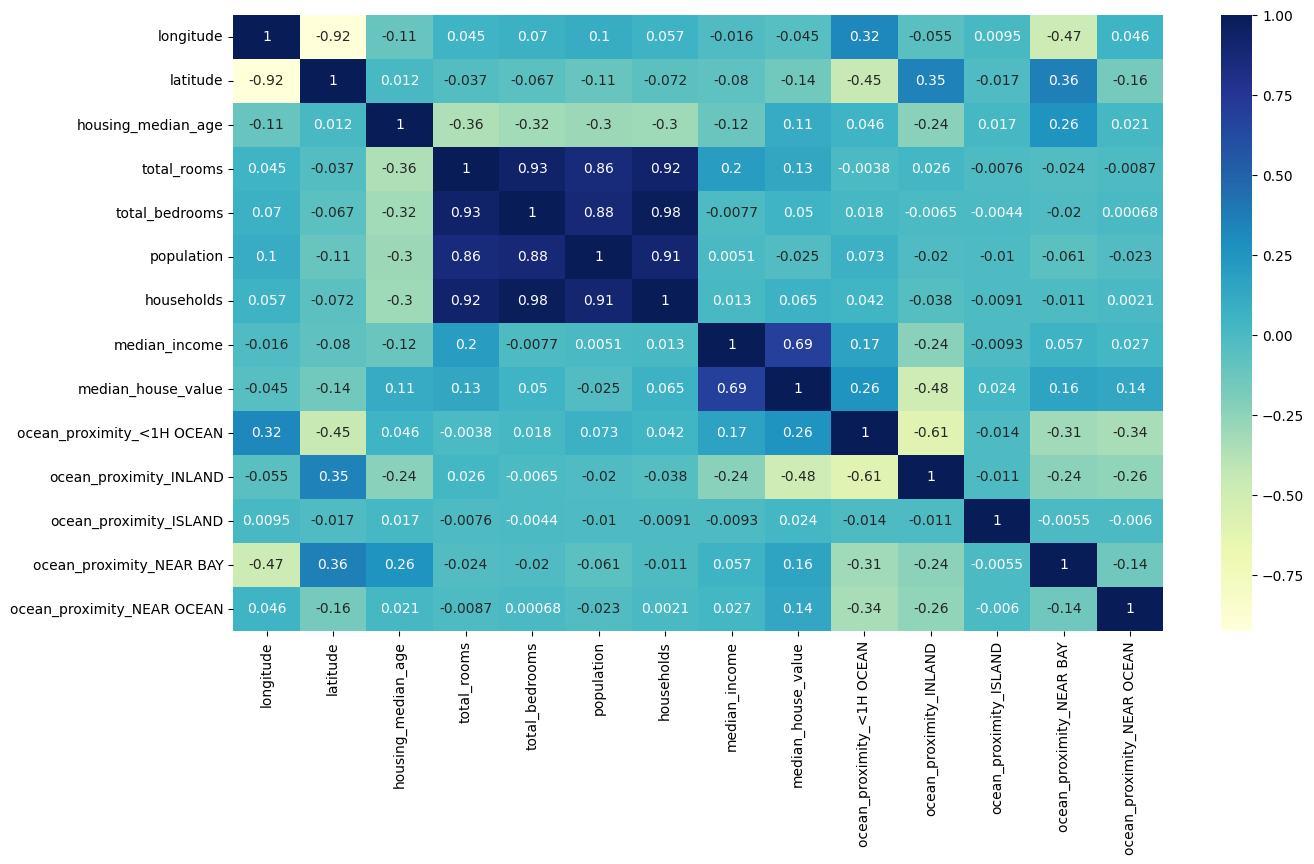

In [13]:
corr_hm(df_1)

In [14]:
df_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
def feature_engineer(data: pd.DataFrame):
    data = data.copy()
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

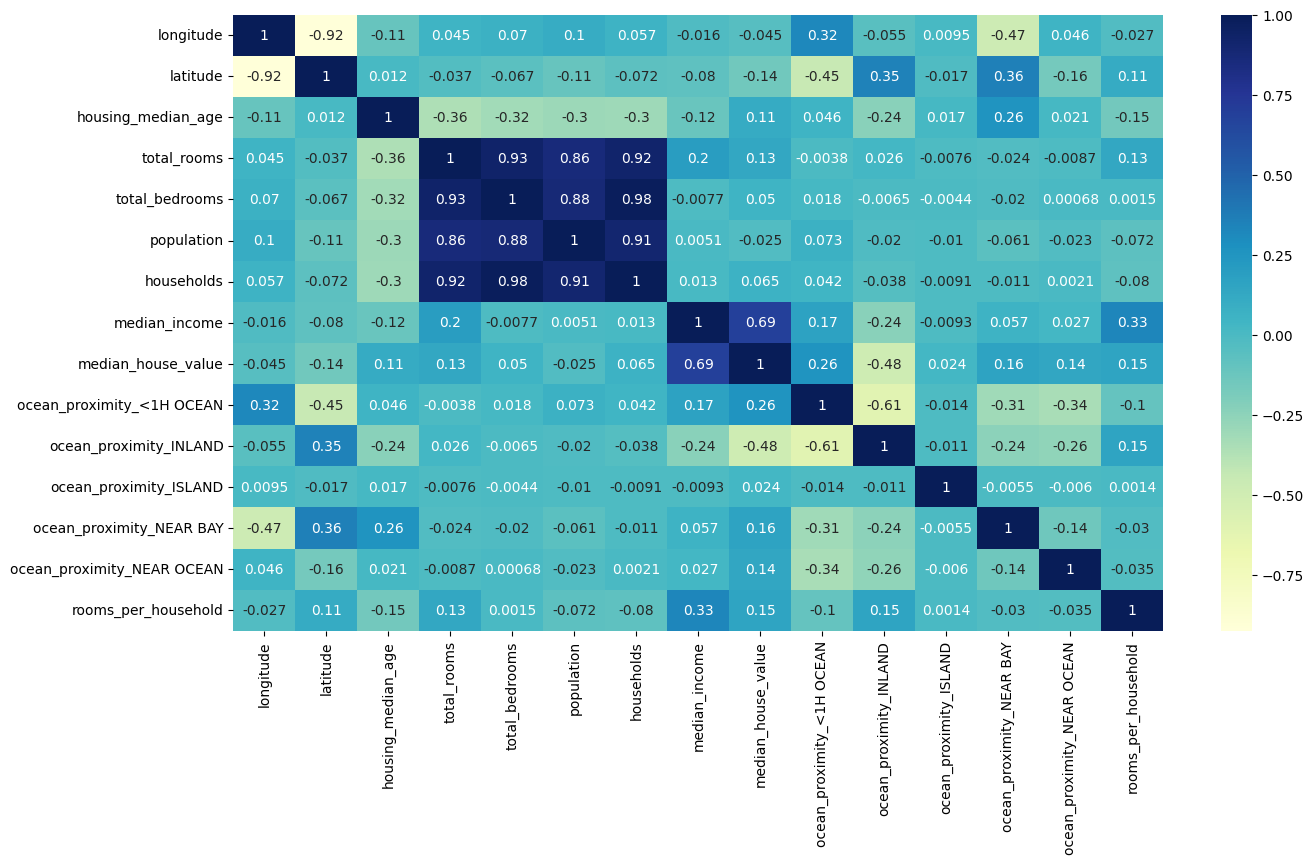

In [16]:
df_2 = feature_engineer(df_1)
corr_hm(df_2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'rooms_per_household'}>, <Axes: >]],
      dtype=object)

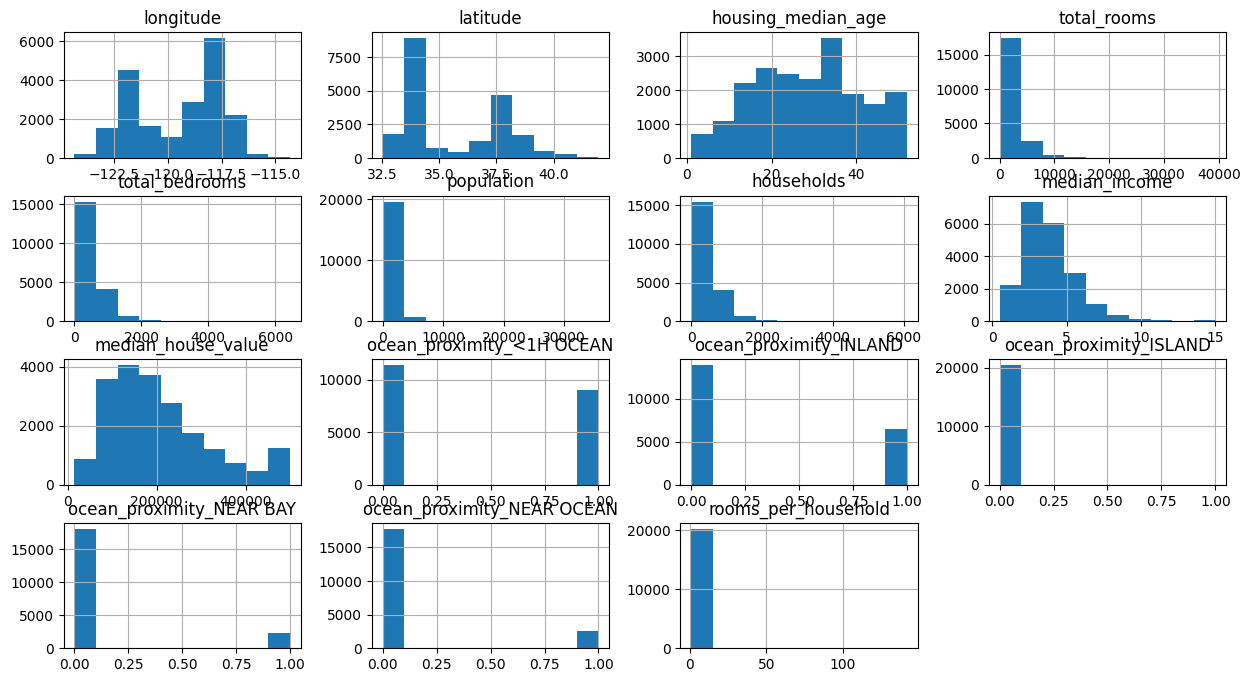

In [17]:
df_2.hist(figsize=(15,8))

In [60]:
X = df_2.drop(['median_house_value'], axis=1)
y = df_2['median_house_value']

In [61]:
print(X.shape, y.shape)

(20433, 14) (20433,)


In [20]:
print(X[:5])
print(y[:5])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0       322.0       126.0         8.3252                        0.0   
1      2401.0      1138.0         8.3014                        0.0   
2       496.0       177.0         7.2574                        0.0   
3       558.0       219.0         5.6431                        0.0   
4       565.0       259.0         3.8462                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                  

In [62]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.32731375,  1.05171726,  0.98216331, ...,  2.82866074,
        -0.38418614,  0.62539465],
       [-1.32232256,  1.04235526, -0.60621017, ...,  2.82866074,
        -0.38418614,  0.3249418 ],
       [-1.33230494,  1.03767426,  1.85576873, ...,  2.82866074,
        -0.38418614,  1.15059359],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.35352419,
        -0.38418614, -0.09094308],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.35352419,
        -0.38418614, -0.04101319],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.35352419,
        -0.38418614, -0.07113779]])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16346, 14) (4087, 14)
(16346,) (4087,)


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
test_pred = model.predict(X_test)

In [26]:
model.score(X_test, y_test)

0.6549046253583148

In [57]:
forest = RandomForestRegressor(n_estimators=200) # using best parameters from GridSearchCV
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [47]:
forest.score(X_test, y_test)

0.8290408517216554

In [59]:
X_test[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,1.0,0.0,0.0,0.0,0.0,6.535484
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,1.0,0.0,0.0,0.0,0.0,6.148148
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,1.0,0.0,0.0,0.0,0.0,4.352442
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,0.0,0.0,0.0,0.0,1.0,7.941529
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,0.0,1.0,0.0,0.0,0.0,5.272152


### Let's now find the best hyperparameters for the forest

In [41]:
param_grid = {
    "n_estimators": [175, 200, 225],
    "min_samples_split": [2, 4, 6]
}

forest = RandomForestRegressor()

search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    return_train_score=True,
    verbose=1,
    n_jobs=6
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [175, 200, 225]},
             return_train_score=True, verbose=1)

In [43]:
best_forest = search.best_estimator_
best_forest.score(X_test, y_test)

0.829471059810352

In [38]:
import skops.io as sio

In [48]:
sio.dump(forest, "forest_model.skops")

In [49]:
sio.dump(scaler, "scaler.skops")

In [50]:
loaded_scaler: StandardScaler = sio.load("scaler.skops")
loaded_scaler.transform(X_test)
_, X_test_new, __, y_test_new = train_test_split(X, y, test_size=0.2, random_state=1)
X_test_new = loaded_scaler.transform(X_test_new)

c:\Users\Piyush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
loaded_model: RandomForestRegressor = sio.load("forest_model.skops")
loaded_model

RandomForestRegressor(n_estimators=200)

In [38]:
loaded_model.score(X_test, y_test)

0.8309771602994038

In [53]:
loaded_model.score(X_test_new, y_test_new)

0.8290408517216554

In [36]:
onx = to_onnx(forest, X[:1].astype(np.float32))
with open("forest_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

InvalidIndexError: (slice(None, 1, None), 0)